In [1]:
# Iporting the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings

import warnings
warnings.filterwarnings('ignore')

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql

In [2]:
# Load 'loan' dataset

loandata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\65 Session 02 - Sep - 2021\Bank_Loan_V1.0.csv", header=0)
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [3]:
# Display the dataset information

loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [4]:
# Extracting Independent Variables "LoanAmount" and "ApplicationIncome"

x = loandata.iloc[:, [6, 8]].values

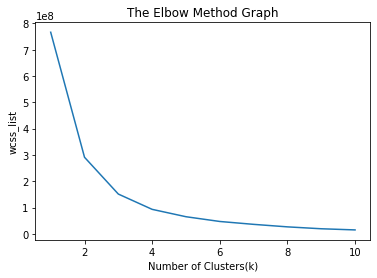

In [8]:
# Finding the optimal number of clusters using the 'elblow method' by using 'within-cluster sums of squares (WCSS)'

from sklearn.cluster import KMeans

wcss_list=[] # initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show() 

In [9]:
# Training the K-means algorithm on the training dataset

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

In [25]:
kmeans.cluster_centers_

array([[4043.45454545,  109.77922078],
       [2506.41304348,   97.58695652],
       [6512.76744186,  119.48837209]])

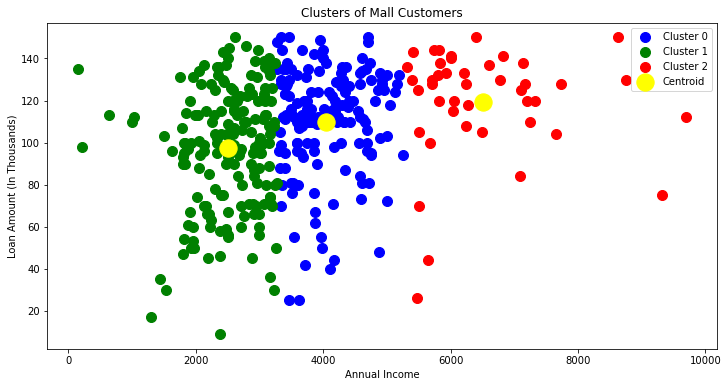

In [26]:
# Visulaizing the clusters

plt.figure(figsize=(12,6))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 0') # for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 1',) # for second cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 2',) # for third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label ='Centroid')# for centroid
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.show()

In [27]:
# Assign the label

loandata['Cluster_Id'] = kmeans.labels_
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_Id
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y,2
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y,1


In [28]:
loandata.sample(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_Id
93,LP001528,Male,No,0,Graduate,No,6277,0.0,118,360.0,0.0,Rural,N,2
187,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135,360.0,1.0,Urban,Y,0
227,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95,300.0,NaN,Urban,Y,1
369,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70,360.0,1.0,Semiurban,Y,1
140,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138,360.0,1.0,Urban,N,0
270,LP002366,Male,Yes,0,Graduate,No,2666,4300.0,121,360.0,1.0,Rural,Y,1
128,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128,360.0,0.0,Semiurban,N,0
129,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130,360.0,1.0,Rural,Y,2
133,LP001726,Male,Yes,0,Graduate,No,3727,1775.0,131,360.0,1.0,Semiurban,Y,0
297,LP002494,Male,No,0,Graduate,No,6000,0.0,140,360.0,1.0,Rural,Y,2
